In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import  OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import klib


In [2]:
df=pd.read_csv("corporate_stress_dataset.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_8864\1016188557.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("corporate_stress_dataset.csv")


In [3]:
df.head()

,ID,Age,Gender,Marital_Status,Job_Role,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Remote_Work,...,Work_Life_Balance,Family_Support_Level,Job_Satisfaction,Performance_Rating,Team_Size,Training_Opportunities,Gender_Bias_Experienced,Discrimination_Experienced,Burnout_Symptoms,Location
0,1,56,Non-Binary,Widowed,Developer,5,102703.08,44,1.72,True,...,9.0,2,5,10.0,38,False,True,True,No,Tier-3
1,2,46,Female,Single,Analyst,20,165583.91,54,0.62,True,...,9.0,1,10,9.0,72,True,True,True,No,Tier-3
2,3,32,Female,Single,Developer,10,38005.39,81,1.22,False,...,6.0,1,1,1.0,67,False,False,False,Yes,Metro
3,4,60,Female,Divorced,Analyst,26,51127.36,79,2.03,False,...,8.0,10,5,10.0,98,True,True,False,Yes,Metro
4,5,25,Male,Married,Sales,29,174597.45,63,1.45,True,...,3.0,1,9,2.0,85,True,False,False,No,Tier-1


In [4]:
df.tail()

,ID,Age,Gender,Marital_Status,Job_Role,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Remote_Work,...,Work_Life_Balance,Family_Support_Level,Job_Satisfaction,Performance_Rating,Team_Size,Training_Opportunities,Gender_Bias_Experienced,Discrimination_Experienced,Burnout_Symptoms,Location
49995,49996,43,Female,Widowed,HR,8,34594.10,58,1.66,False,...,4.0,8,7,3.0,69,True,True,False,No,Tier-3
49996,49997,45,Male,Single,Analyst,31,117925.92,42,1.58,False,...,10.0,3,0,4.0,60,True,True,True,Occasional,Tier-2
49997,49998,43,Female,Divorced,Manager,7,109814.51,49,1.49,True,...,0.0,0,10,6.0,56,False,True,False,No,Metro
49998,49999,62,Male,Married,HR,9,74918.42,72,2.64,False,...,10.0,4,2,8.0,50,True,False,True,Yes,Tier-2
49999,50000,19,Female,Divorced,Manager,0,31783.31,50,2.52,True,...,10.0,6,6,1.0,50,True,True,False,No,Tier-1


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\klib\describe.py:122: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data.loc[data[col].isin(value_counts_idx_top), col] = 10


TypeError: 'bool' object is not subscriptable

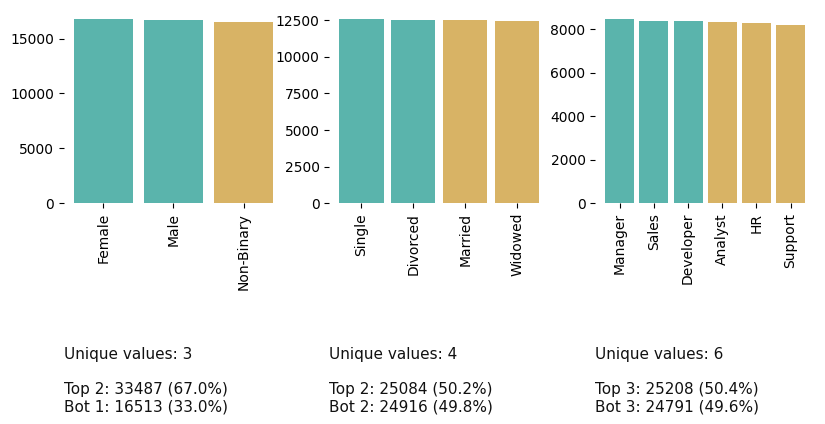

In [5]:
klib.cat_plot(df, figsize=(44, 16))


In [6]:
df_reduced = klib.data_cleaning(df)


Shape of cleaned data: (50000, 30) - Remaining NAs: 12550


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 6.87 MB (-67.95%)



GridSpec(6, 6)

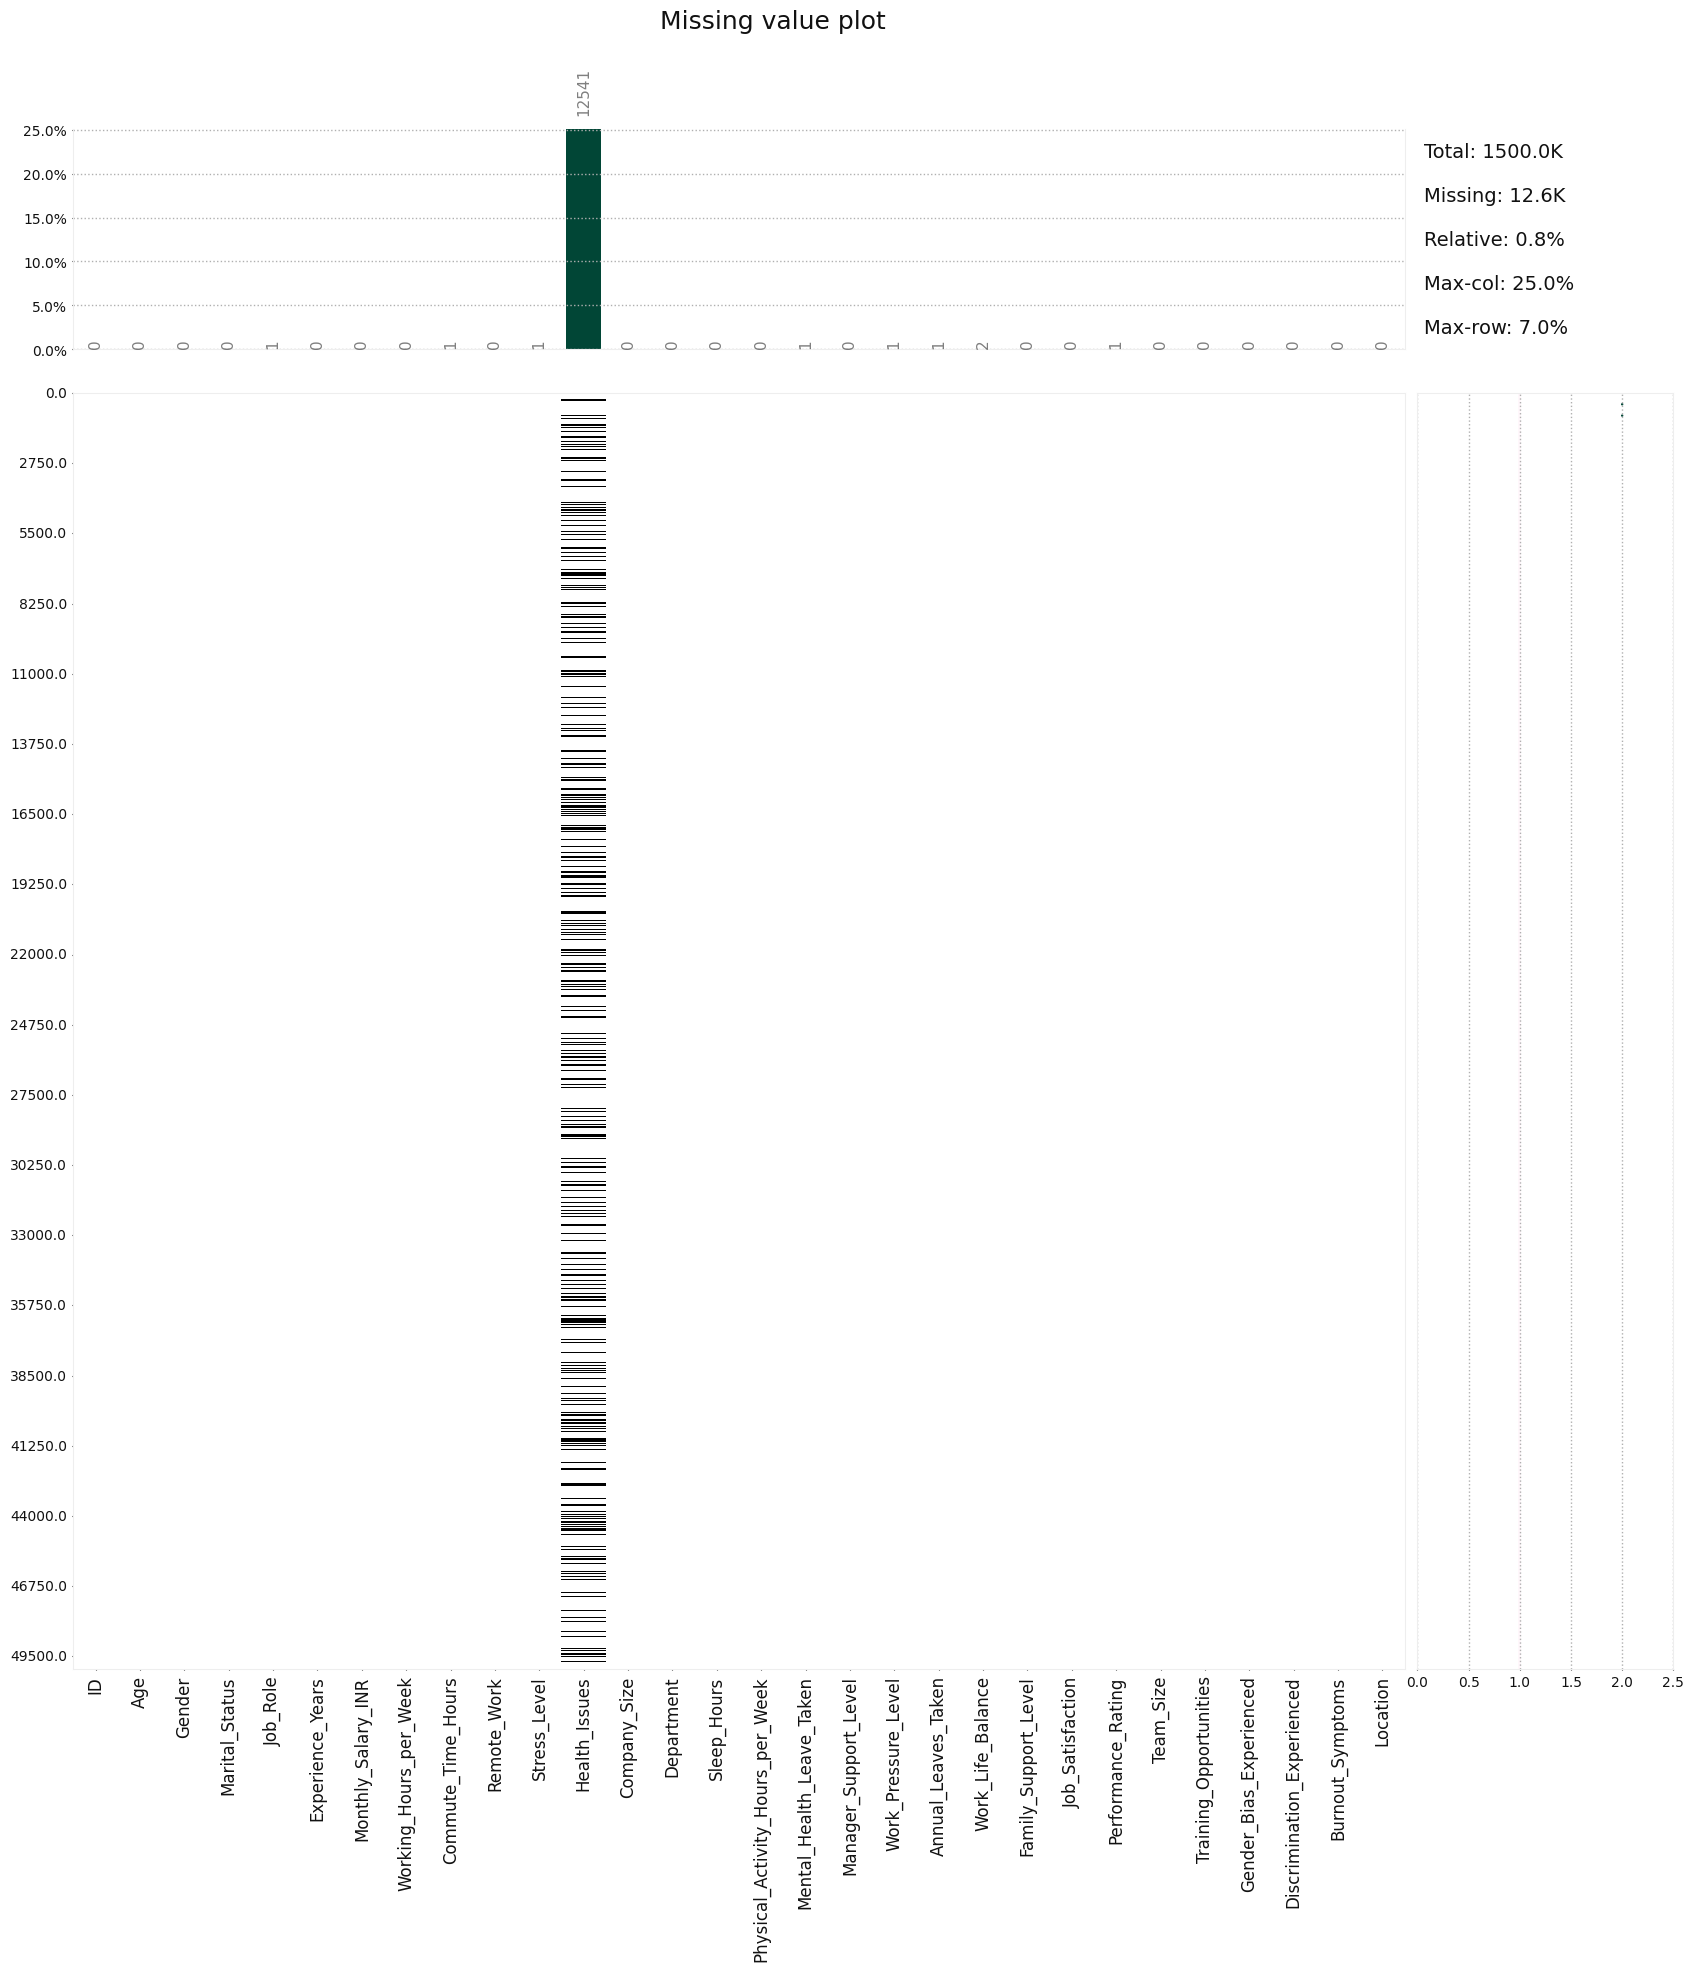

In [7]:
klib.missingval_plot(df)

In [8]:
df_cleaned = klib.data_cleaning(df)

Shape of cleaned data: (50000, 30) - Remaining NAs: 12550


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 6.87 MB (-67.95%)



In [9]:
print(df_cleaned.head())

   id  age      gender marital_status   job_role  experience_years  \
0   1   56  Non-Binary        Widowed  Developer                 5   
1   2   46      Female         Single    Analyst                20   
2   3   32      Female         Single  Developer                10   
3   4   60      Female       Divorced    Analyst                26   
4   5   25        Male        Married      Sales                29   

   monthly_salary_inr  working_hours_per_week  commute_time_hours  \
0           102703.08                      44                1.72   
1           165583.91                      54                0.62   
2            38005.39                      81                1.22   
3            51127.36                      79                2.03   
4           174597.45                      63                1.45   

   remote_work  ...  work_life_balance family_support_level job_satisfaction  \
0         True  ...                9.0                    2                5   
1   

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                50000 non-null  int64  
 1   Age                               50000 non-null  int64  
 2   Gender                            50000 non-null  object 
 3   Marital_Status                    50000 non-null  object 
 4   Job_Role                          49999 non-null  object 
 5   Experience_Years                  50000 non-null  int64  
 6   Monthly_Salary_INR                50000 non-null  float64
 7   Working_Hours_per_Week            50000 non-null  int64  
 8   Commute_Time_Hours                49999 non-null  float64
 9   Remote_Work                       50000 non-null  bool   
 10  Stress_Level                      49999 non-null  float64
 11  Health_Issues                     37459 non-null  object 
 12  Comp

In [11]:
df.isnull().sum()

ID                                      0
Age                                     0
Gender                                  0
Marital_Status                          0
Job_Role                                1
Experience_Years                        0
Monthly_Salary_INR                      0
Working_Hours_per_Week                  0
Commute_Time_Hours                      1
Remote_Work                             0
Stress_Level                            1
Health_Issues                       12541
Company_Size                            0
Department                              0
Sleep_Hours                             0
Physical_Activity_Hours_per_Week        0
Mental_Health_Leave_Taken               1
Manager_Support_Level                   0
Work_Pressure_Level                     1
Annual_Leaves_Taken                     1
Work_Life_Balance                       2
Family_Support_Level                    0
Job_Satisfaction                        0
Performance_Rating                

In [12]:
df.drop("Working_Hours_per_Week", axis=1, inplace=True)
df.drop("Remote_Work", axis=1, inplace=True)
df.drop("Company_Size", axis=1, inplace=True)
df.drop("Commute_Time_Hours", axis=1, inplace=True)
df.drop("Location", axis=1, inplace=True)



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                50000 non-null  int64  
 1   Age                               50000 non-null  int64  
 2   Gender                            50000 non-null  object 
 3   Marital_Status                    50000 non-null  object 
 4   Job_Role                          49999 non-null  object 
 5   Experience_Years                  50000 non-null  int64  
 6   Monthly_Salary_INR                50000 non-null  float64
 7   Stress_Level                      49999 non-null  float64
 8   Health_Issues                     37459 non-null  object 
 9   Department                        50000 non-null  object 
 10  Sleep_Hours                       50000 non-null  float64
 11  Physical_Activity_Hours_per_Week  50000 non-null  float64
 12  Ment

In [14]:
for col in df.columns:
  if df[col].isnull().sum()>0:
    if df[col].dtype == 'object':
      df[col].fillna(df[col].mode()[0], inplace=True)
    else:
      df[col].fillna(df[col].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16344\3422077385.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_16344\3422077385.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [15]:
df.isnull().sum()

ID                                  0
Age                                 0
Gender                              0
Marital_Status                      0
Job_Role                            0
Experience_Years                    0
Monthly_Salary_INR                  0
Stress_Level                        0
Health_Issues                       0
Department                          0
Sleep_Hours                         0
Physical_Activity_Hours_per_Week    0
Mental_Health_Leave_Taken           0
Manager_Support_Level               0
Work_Pressure_Level                 0
Annual_Leaves_Taken                 0
Work_Life_Balance                   0
Family_Support_Level                0
Job_Satisfaction                    0
Performance_Rating                  0
Team_Size                           0
Training_Opportunities              0
Gender_Bias_Experienced             0
Discrimination_Experienced          0
Burnout_Symptoms                    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                50000 non-null  int64  
 1   Age                               50000 non-null  int64  
 2   Gender                            50000 non-null  object 
 3   Marital_Status                    50000 non-null  object 
 4   Job_Role                          50000 non-null  object 
 5   Experience_Years                  50000 non-null  int64  
 6   Monthly_Salary_INR                50000 non-null  float64
 7   Stress_Level                      50000 non-null  float64
 8   Health_Issues                     50000 non-null  object 
 9   Department                        50000 non-null  object 
 10  Sleep_Hours                       50000 non-null  float64
 11  Physical_Activity_Hours_per_Week  50000 non-null  float64
 12  Ment

In [19]:
categorical_col = df.select_dtypes(include=['object', 'category']).columns

categorical_col
     

Index(['Gender', 'Marital_Status', 'Job_Role', 'Health_Issues', 'Department',
       'Mental_Health_Leave_Taken', 'Burnout_Symptoms'],
      dtype='object')

In [18]:
cordinalaty = df[categorical_col].nunique()

cordinalaty

Gender                       3
Marital_Status               4
Job_Role                     6
Health_Issues                3
Department                   6
Mental_Health_Leave_Taken    6
Burnout_Symptoms             4
dtype: int64

In [20]:
# Misol ma'lumotlar to'plami
data = {'Burnout_Symptoms': ['Gender', 'Marital_Status', 'Job_Role', 'HealthMental_Health_Leave_Taken_Issues','Health_Issues', 'Department']}
df = pd.DataFrame(data)

# One-Hot Encoding
encoded_df = pd.get_dummies(df, columns=['Burnout_Symptoms'])

print(encoded_df)


   Burnout_Symptoms_Department  Burnout_Symptoms_Gender  \
0                        False                     True   
1                        False                    False   
2                        False                    False   
3                        False                    False   
4                        False                    False   
5                         True                    False   

   Burnout_Symptoms_HealthMental_Health_Leave_Taken_Issues  \
0                                              False         
1                                              False         
2                                              False         
3                                               True         
4                                              False         
5                                              False         

   Burnout_Symptoms_Health_Issues  Burnout_Symptoms_Job_Role  \
0                           False                      False   
1                      

In [21]:
label_encoder = LabelEncoder()
for colname in df.select_dtypes("object"):
    df[colname] = label_encoder.fit_transform(df[colname])

print(df.head())

   Burnout_Symptoms
0                 1
1                 5
2                 4
3                 2
4                 3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Burnout_Symptoms  6 non-null      int64
dtypes: int64(1)
memory usage: 180.0 bytes


In [23]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif



In [24]:
df = pd.read_csv("corporate_stress_dataset.csv")



C:\Users\user\AppData\Local\Temp\ipykernel_6268\4291305717.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("corporate_stress_dataset.csv")


In [24]:
missing_columns=df.isnull().sum()>0
for col in missing_columns.index:
    if df[col].dtype=="object":
        df[col].fillna(df[col].mode()[0],inplace=True)
    else:
        df[col].fillna(df[col].mean(),inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_16344\45837989.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


In [24]:
X=df.drop("Burnout_Symptoms",axis=1)
y=df["Burnout_Symptoms"]

In [25]:


X = df["Burnout_Symptoms"]
y = df["Burnout_Symptoms"]



In [26]:
X = pd.get_dummies(X)
mi_scores = mutual_info_classif(X, y)


mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
print(mi_df.sort_values(by='MI Score', ascending=False))

NameError: name 'X' is not defined

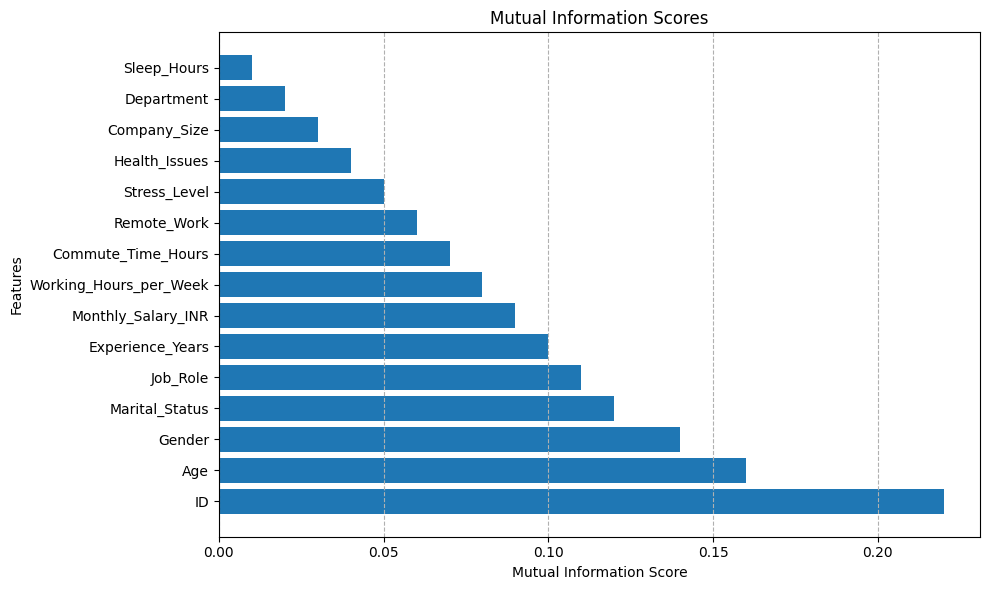

In [25]:
import matplotlib.pyplot as plt

features = [
    'ID', 'Age', 'Gender', 'Marital_Status', 'Job_Role', 
    'Experience_Years', 'Monthly_Salary_INR', 'Working_Hours_per_Week',
    'Commute_Time_Hours', 'Remote_Work', 'Stress_Level', 
    'Health_Issues', 'Company_Size', 'Department', 'Sleep_Hours'
]

mutual_info_scores = [0.22, 0.16, 0.14, 0.12, 0.11, 0.10, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]

plt.figure(figsize=(10, 6))
plt.barh(features, mutual_info_scores)
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual Information Scores')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


In [2]:
df=pd.read_csv("corporate_stress_dataset.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_11096\1016188557.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("corporate_stress_dataset.csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                50000 non-null  int64  
 1   Age                               50000 non-null  int64  
 2   Gender                            50000 non-null  object 
 3   Marital_Status                    50000 non-null  object 
 4   Job_Role                          49999 non-null  object 
 5   Experience_Years                  50000 non-null  int64  
 6   Monthly_Salary_INR                50000 non-null  float64
 7   Working_Hours_per_Week            50000 non-null  int64  
 8   Commute_Time_Hours                49999 non-null  float64
 9   Remote_Work                       50000 non-null  bool   
 10  Stress_Level                      49999 non-null  float64
 11  Health_Issues                     37459 non-null  object 
 12  Comp

In [4]:
print(df.columns.tolist())

['ID', 'Age', 'Gender', 'Marital_Status', 'Job_Role', 'Experience_Years', 'Monthly_Salary_INR', 'Working_Hours_per_Week', 'Commute_Time_Hours', 'Remote_Work', 'Stress_Level', 'Health_Issues', 'Company_Size', 'Department', 'Sleep_Hours', 'Physical_Activity_Hours_per_Week', 'Mental_Health_Leave_Taken', 'Manager_Support_Level', 'Work_Pressure_Level', 'Annual_Leaves_Taken', 'Work_Life_Balance', 'Family_Support_Level', 'Job_Satisfaction', 'Performance_Rating', 'Team_Size', 'Training_Opportunities', 'Gender_Bias_Experienced', 'Discrimination_Experienced', 'Burnout_Symptoms', 'Location']


In [5]:
# Nechta Objects columns borligini aniqlab olamiz
object_columns = df.select_dtypes(include=['object'])
print(f"Number of object columns: {len(object_columns.columns)}")
print("Object columns:")
print(object_columns.columns.tolist())


Number of object columns: 9
Object columns:
['Gender', 'Marital_Status', 'Job_Role', 'Health_Issues', 'Company_Size', 'Department', 'Mental_Health_Leave_Taken', 'Burnout_Symptoms', 'Location']


In [6]:
# Har bir obkects ni cardinalitylarini korib olamiz
categorical_cols = ['Gender', 'Marital_Status', 'Job_Role', 'Health_Issues', 'Company_Size', 'Department', 'Mental_Health_Leave_Taken', 'Burnout_Symptoms', 'Location']

for col in categorical_cols:
    print(f"Cardinality of '{col}': {df[col].nunique()}")

Cardinality of 'Gender': 3
Cardinality of 'Marital_Status': 4
Cardinality of 'Job_Role': 6
Cardinality of 'Health_Issues': 3
Cardinality of 'Company_Size': 3
Cardinality of 'Department': 6
Cardinality of 'Mental_Health_Leave_Taken': 6
Cardinality of 'Burnout_Symptoms': 4
Cardinality of 'Location': 4


In [7]:
# cardinality ni koramiz
cardinality=df[categorical_cols].nunique()

In [8]:
#
cardinality

Gender                       3
Marital_Status               4
Job_Role                     6
Health_Issues                3
Company_Size                 3
Department                   6
Mental_Health_Leave_Taken    6
Burnout_Symptoms             4
Location                     4
dtype: int64

In [9]:
# High va Low cardinalityga ajratib olamiz 
categorical_cols = df.select_dtypes(include=['object']).columns

# classlar soni 5 dan yuqori bolsa u high cordinality hisoblanadi
high_cardinality_cols = [col for col in categorical_cols if df[col].nunique() > 5]

print("High cardinality columns:", high_cardinality_cols)


High cardinality columns: ['Job_Role', 'Department', 'Mental_Health_Leave_Taken']


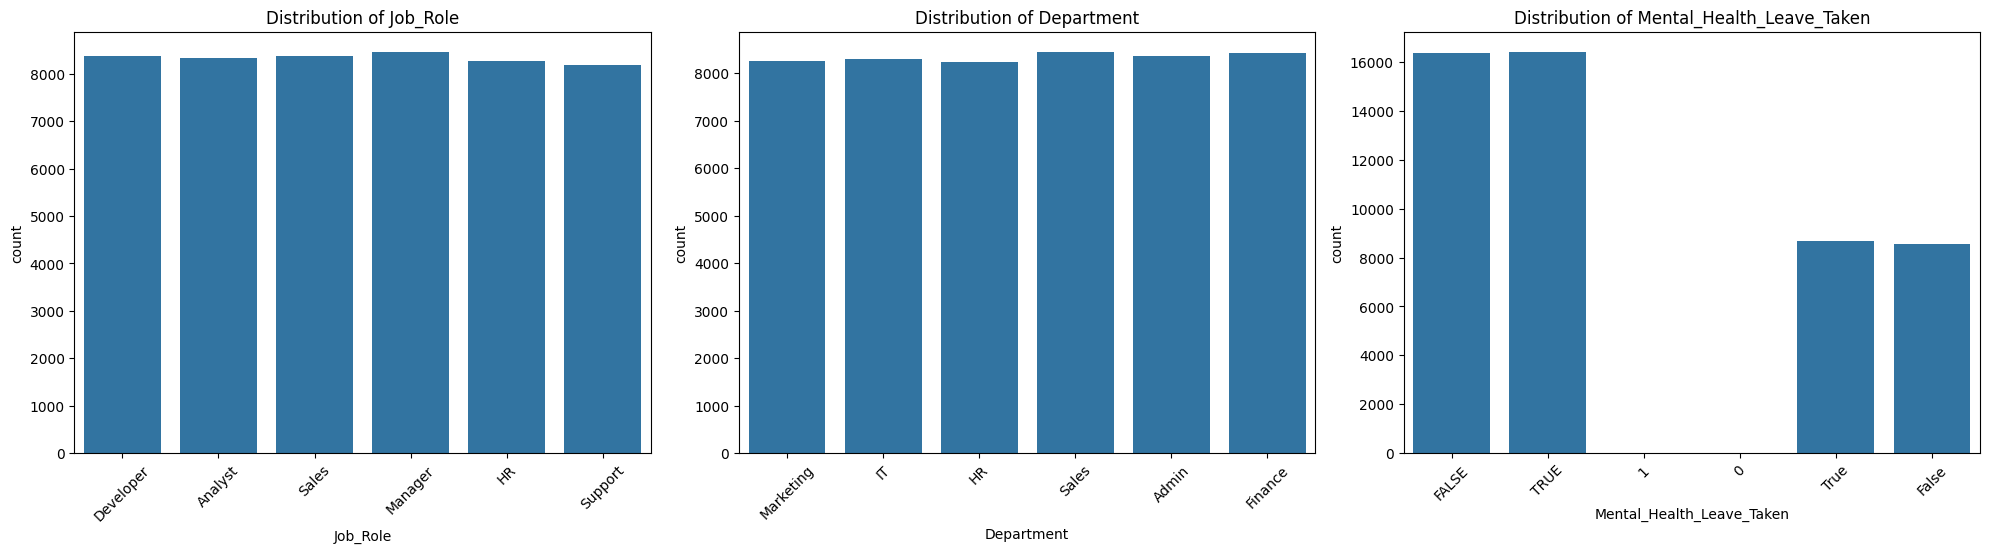

In [10]:
# plotingda high corrdinalityni korib olamiz
plt.figure(figsize=(20, 10))


for i, col in enumerate(high_cardinality_cols, 1):
    plt.subplot(len(high_cardinality_cols) // 3 + 1, 3, i)  
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

In [11]:
# High cordinalityni label encoding ga qoyamiz 

label_encoder = LabelEncoder()

# Columns to be label-encoded
columns_to_encode = ['Job_Role', 'Department',]

# har bir high cordinality ustunga label encodingni qollaymiz
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [12]:
# plotingda korinib turibdiki Mental_Health_Leave_Taken columnda booleanlar bor buni intga otkazib olamiz

# Convert 'TRUE'/'FALSE' strings to boolean (True/False)
df['Mental_Health_Leave_Taken'] = df['Mental_Health_Leave_Taken'].apply(lambda x: True if str(x).upper() == 'TRUE' else False)

# (True -> 1, False -> 0)
df['Mental_Health_Leave_Taken'] = df['Mental_Health_Leave_Taken'].astype(int)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                50000 non-null  int64  
 1   Age                               50000 non-null  int64  
 2   Gender                            50000 non-null  object 
 3   Marital_Status                    50000 non-null  object 
 4   Job_Role                          50000 non-null  int64  
 5   Experience_Years                  50000 non-null  int64  
 6   Monthly_Salary_INR                50000 non-null  float64
 7   Working_Hours_per_Week            50000 non-null  int64  
 8   Commute_Time_Hours                49999 non-null  float64
 9   Remote_Work                       50000 non-null  bool   
 10  Stress_Level                      49999 non-null  float64
 11  Health_Issues                     37459 non-null  object 
 12  Comp

In [14]:

# agar classlar soni 5 dan kichik bolsa uni low cordinality deb oldik 
low_cardinality_cols = [col for col in categorical_cols if df[col].nunique() <= 10]

print("Low cardinality columns:", low_cardinality_cols)


Low cardinality columns: ['Gender', 'Marital_Status', 'Job_Role', 'Health_Issues', 'Company_Size', 'Department', 'Mental_Health_Leave_Taken', 'Burnout_Symptoms', 'Location']


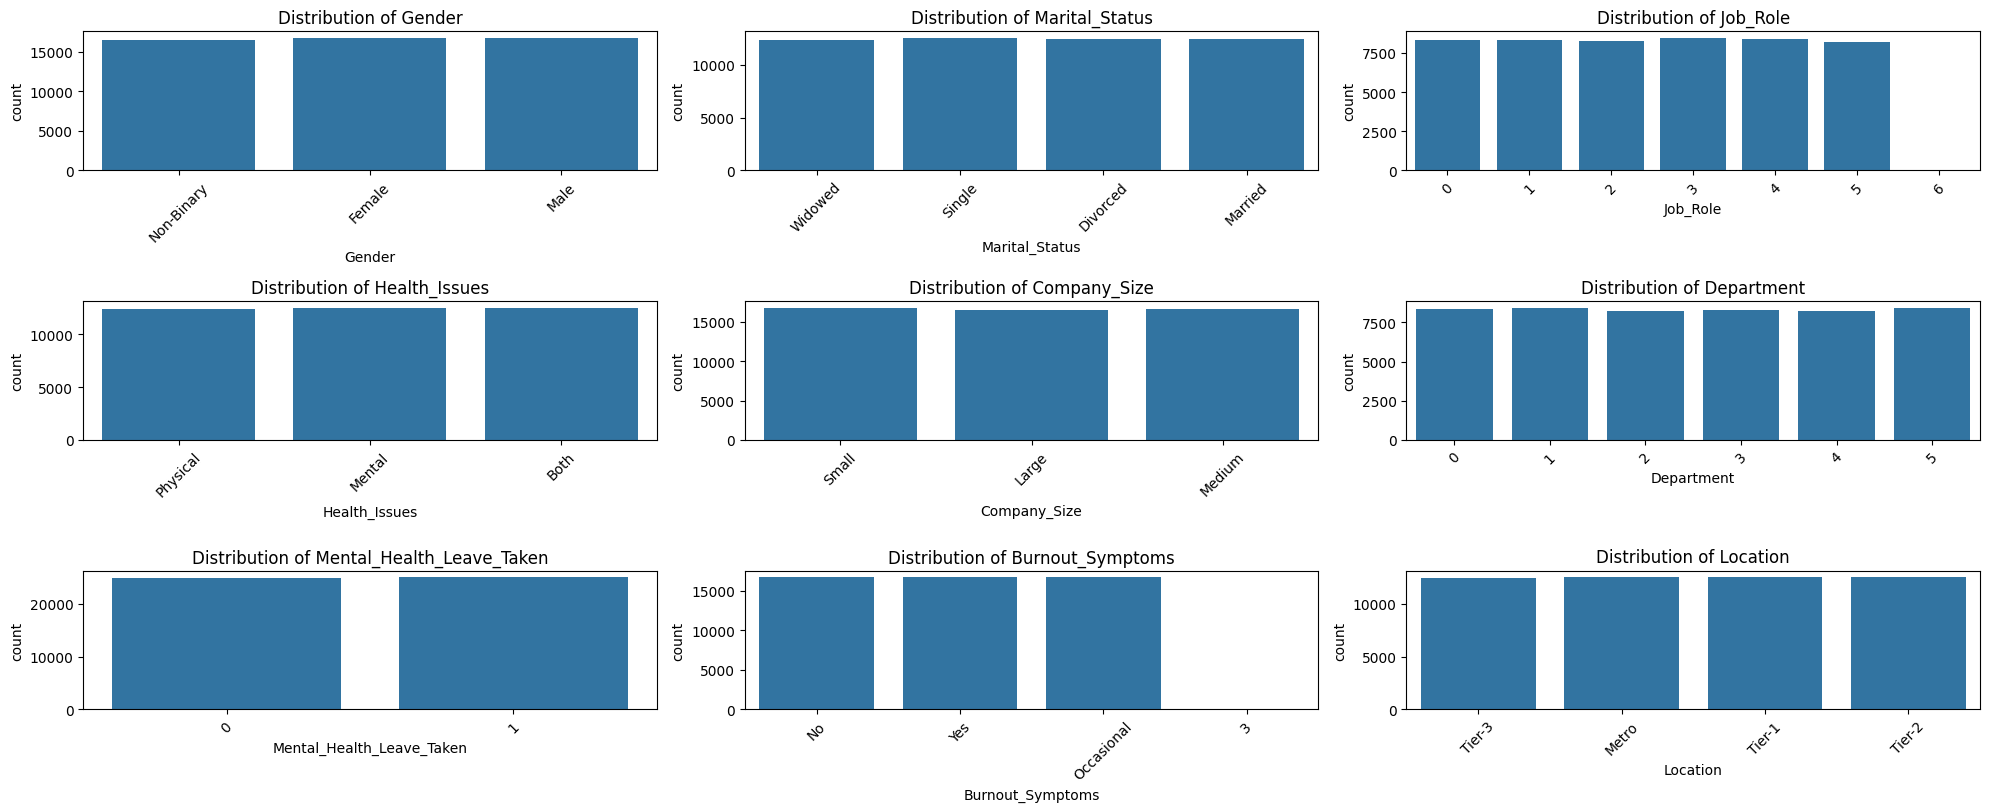

In [15]:
# ploting orqali korib olamiz
plt.figure(figsize=(20, 10))


for i, col in enumerate(low_cardinality_cols, 1):
    plt.subplot(len(low_cardinality_cols) // 3 + 1, 3, i) 
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45) 


plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

#  Label Encoding >>> 'Gender', 'Health_Issues', 'Mental_Health_Leave_Taken', 'Burnout_Symptoms'
label_columns = ['Gender', 'Health_Issues', 'Mental_Health_Leave_Taken', 'Burnout_Symptoms', 'Company_Size']
for column in label_columns:
    df[column] = label_encoder.fit_transform(df[column])

# One-Hot Encoding for columns >>> 'Location', 'Job_Role', 'Department', 'Marital_Status'
df = pd.get_dummies(df, columns=['Location', 'Job_Role', 'Department', 'Marital_Status'], drop_first=True)


print(df.head())


   ID  Age  Gender  Experience_Years  Monthly_Salary_INR  \
0   1   56       2                 5           102703.08   
1   2   46       0                20           165583.91   
2   3   32       0                10            38005.39   
3   4   60       0                26            51127.36   
4   5   25       1                29           174597.45   

   Working_Hours_per_Week  Commute_Time_Hours  Remote_Work  Stress_Level  \
0                      44                1.72         True           0.0   
1                      54                0.62         True           7.0   
2                      81                1.22        False           7.0   
3                      79                2.03        False           6.0   
4                      63                1.45         True           8.0   

   Health_Issues  ...  Job_Role_5  Job_Role_6  Department_1  Department_2  \
0              3  ...       False       False         False         False   
1              3  ...       

In [17]:
df.describe()

,ID,Age,Gender,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Stress_Level,Health_Issues,Company_Size,...,Mental_Health_Leave_Taken,Manager_Support_Level,Work_Pressure_Level,Annual_Leaves_Taken,Work_Life_Balance,Family_Support_Level,Job_Satisfaction,Performance_Rating,Team_Size,Burnout_Symptoms
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,49999.000000,49999.000000,50000.00000,50000.000000,...,50000.000000,50000.000000,49999.000000,49999.000000,49998.000000,50000.000000,50000.00000,49999.000000,50000.00000,50000.000000
mean,25000.500000,41.518600,0.99488,20.071580,110129.926165,62.53824,1.500441,5.004660,1.49942,1.007000,...,0.501460,5.004120,5.004460,14.992120,4.996880,4.993940,4.98412,5.006880,50.49730,1.999940
std,14433.901067,13.833279,0.81586,11.835681,52069.676542,16.16981,0.867742,3.154774,1.11910,0.816336,...,0.500003,3.160314,3.159633,8.943396,3.165683,3.160674,3.16003,3.176538,28.89238,0.816427
min,1.000000,18.000000,0.00000,0.000000,20001.960000,35.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.00000,0.000000
25%,12500.750000,30.000000,0.00000,10.000000,64875.487500,49.00000,0.740000,2.000000,0.00000,0.000000,...,0.000000,2.000000,2.000000,7.000000,2.000000,2.000000,2.00000,2.000000,25.00000,1.000000
50%,25000.500000,41.000000,1.00000,20.000000,110168.205000,62.00000,1.500000,5.000000,1.00000,1.000000,...,1.000000,5.000000,5.000000,15.000000,5.000000,5.000000,5.00000,5.000000,51.00000,2.000000
75%,37500.250000,54.000000,2.00000,30.000000,155322.665000,77.00000,2.250000,8.000000,3.00000,2.000000,...,1.000000,8.000000,8.000000,23.000000,8.000000,8.000000,8.00000,8.000000,75.00000,3.000000
max,50000.000000,65.000000,2.00000,40.000000,199992.800000,90.00000,3.000000,10.000000,3.00000,2.000000,...,1.000000,10.000000,10.000000,30.000000,10.000000,10.000000,10.00000,10.000000,100.00000,3.000000


In [19]:
# bizda boolean columnslar bor edi ulardi intga otkazdik
bool_columns = df.select_dtypes(include='bool').columns  # Get all boolean columns
df[bool_columns] = df[bool_columns].astype(int)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                50000 non-null  int64  
 1   Age                               50000 non-null  int64  
 2   Gender                            50000 non-null  int64  
 3   Experience_Years                  50000 non-null  int64  
 4   Monthly_Salary_INR                50000 non-null  float64
 5   Working_Hours_per_Week            50000 non-null  int64  
 6   Commute_Time_Hours                49999 non-null  float64
 7   Remote_Work                       50000 non-null  int64  
 8   Stress_Level                      49999 non-null  float64
 9   Health_Issues                     50000 non-null  int64  
 10  Company_Size                      50000 non-null  int64  
 11  Sleep_Hours                       50000 non-null  float64
 12  Phys

In [21]:
import numpy as np

# floatlarni intga otkazib olamiz
float_columns = df.select_dtypes(include='float64').columns

df[float_columns] = df[float_columns].apply(lambda x: x.fillna(x.median()))  # Replace NaN with median of the column
df[float_columns] = df[float_columns].applymap(lambda x: x if np.isfinite(x) else 0)  # Replace Inf with 0

df[float_columns] = df[float_columns].round().astype(int)



C:\Users\user\AppData\Local\Temp\ipykernel_11096\4019993668.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[float_columns] = df[float_columns].applymap(lambda x: x if np.isfinite(x) else 0)  # Replace Inf with 0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ID                                50000 non-null  int64
 1   Age                               50000 non-null  int64
 2   Gender                            50000 non-null  int64
 3   Experience_Years                  50000 non-null  int64
 4   Monthly_Salary_INR                50000 non-null  int64
 5   Working_Hours_per_Week            50000 non-null  int64
 6   Commute_Time_Hours                50000 non-null  int64
 7   Remote_Work                       50000 non-null  int64
 8   Stress_Level                      50000 non-null  int64
 9   Health_Issues                     50000 non-null  int64
 10  Company_Size                      50000 non-null  int64
 11  Sleep_Hours                       50000 non-null  int64
 12  Physical_Activity_Hours_per_Week

In [24]:
# duplicated bolgan ustunlarni tekshirib olamiz
df.duplicated().sum()

np.int64(0)

In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler 


scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Step 2: Specify columns for scaling (StandardScaler) and normalization (MinMaxScaler)
columns_to_scale = [
    'Age', 'Experience_Years', 'Monthly_Salary_INR', 'Working_Hours_per_Week', 'Commute_Time_Hours', 
    'Stress_Level', 'Health_Issues', 'Sleep_Hours', 'Physical_Activity_Hours_per_Week', 'Mental_Health_Leave_Taken',
    'Manager_Support_Level', 'Work_Pressure_Level', 'Annual_Leaves_Taken', 'Work_Life_Balance', 'Family_Support_Level',
    'Job_Satisfaction', 'Performance_Rating', 'Team_Size', 'Training_Opportunities', 'Gender_Bias_Experienced', 
    'Discrimination_Experienced', 'Burnout_Symptoms', 'Job_Role_1', 'Job_Role_2', 'Job_Role_3', 'Job_Role_4', 
    'Job_Role_5', 'Job_Role_6', 'Department_1', 'Department_2', 'Department_3', 'Department_4', 'Department_5'
]

columns_to_normalize = [
    'Location_Tier-1', 'Location_Tier-2', 'Location_Tier-3', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Widowed'
]

df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler_standard.fit_transform(df[columns_to_scale])

df_normalized = df.copy()
df_normalized[columns_to_normalize] = scaler_minmax.fit_transform(df[columns_to_normalize])

print("Standardized Data (first 5 rows):")
print(df_scaled.head())

print("\nNormalized Data (first 5 rows):")
print(df_normalized.head())



Standardized Data (first 5 rows):
   ID       Age  Gender  Experience_Years  Monthly_Salary_INR  \
0   1  1.046863       2         -1.273415           -0.142636   
1   2  0.323961       0         -0.006048            1.065008   
2   3 -0.688101       0         -0.850959           -1.385176   
3   4  1.336023       0          0.500899           -1.133165   
4   5 -1.194132       1          0.754372            1.238105   

   Working_Hours_per_Week  Commute_Time_Hours  Remote_Work  Stress_Level  \
0               -1.146484            0.520325            1     -1.586409   
1               -0.528041           -0.520867            1      0.632495   
2                1.141754           -0.520867            0      0.632495   
3                1.018065            0.520325            0      0.315509   
4                0.028557           -0.520867            1      0.949482   

   Health_Issues  ...  Job_Role_5  Job_Role_6  Department_1  Department_2  \
0       1.340895  ...   -0.442332   -0.00

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ID                                50000 non-null  int64
 1   Age                               50000 non-null  int64
 2   Gender                            50000 non-null  int64
 3   Experience_Years                  50000 non-null  int64
 4   Monthly_Salary_INR                50000 non-null  int64
 5   Working_Hours_per_Week            50000 non-null  int64
 6   Commute_Time_Hours                50000 non-null  int64
 7   Remote_Work                       50000 non-null  int64
 8   Stress_Level                      50000 non-null  int64
 9   Health_Issues                     50000 non-null  int64
 10  Company_Size                      50000 non-null  int64
 11  Sleep_Hours                       50000 non-null  int64
 12  Physical_Activity_Hours_per_Week

<Axes: >

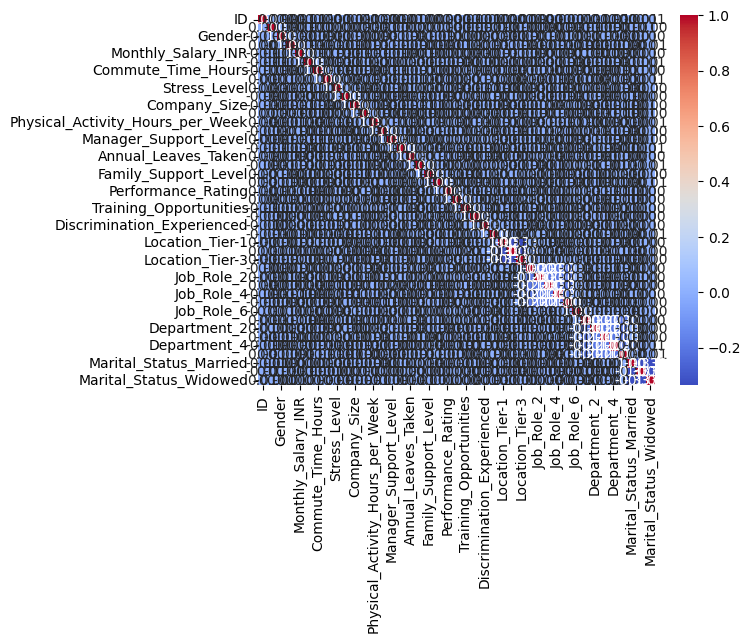

In [28]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')


In [33]:
df_reduced = klib.data_cleaning(df)

Shape of cleaned data: (50000, 43) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 14.06 MB (-85.73%)



In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ID                                50000 non-null  int64
 1   Age                               50000 non-null  int64
 2   Gender                            50000 non-null  int64
 3   Experience_Years                  50000 non-null  int64
 4   Monthly_Salary_INR                50000 non-null  int64
 5   Working_Hours_per_Week            50000 non-null  int64
 6   Commute_Time_Hours                50000 non-null  int64
 7   Remote_Work                       50000 non-null  int64
 8   Stress_Level                      50000 non-null  int64
 9   Health_Issues                     50000 non-null  int64
 10  Company_Size                      50000 non-null  int64
 11  Sleep_Hours                       50000 non-null  int64
 12  Physical_Activity_Hours_per_Week

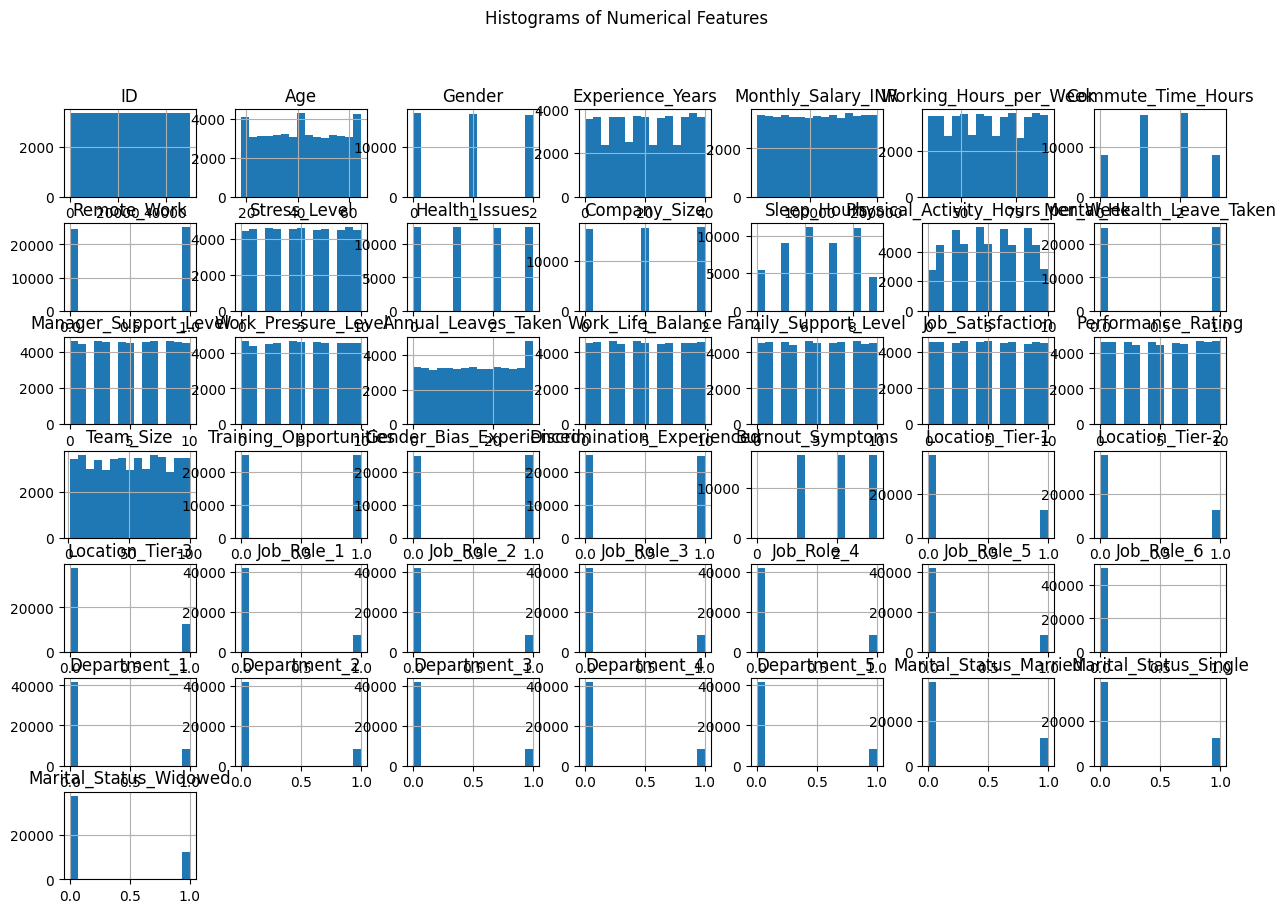

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical features
numerical_columns = df.select_dtypes(include=['int64']).columns
df[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()


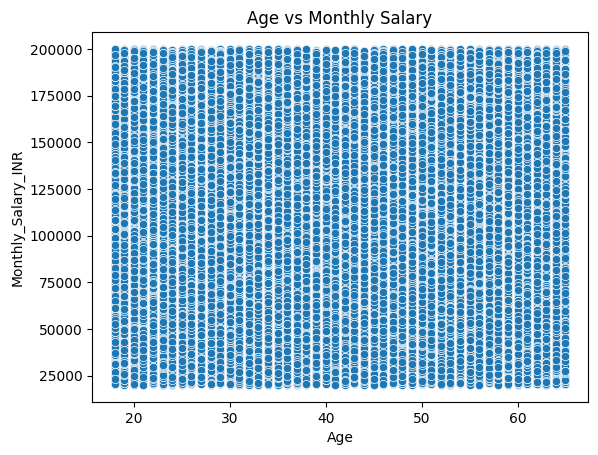

In [38]:
# Scatter plot between two variables
sns.scatterplot(x='Age', y='Monthly_Salary_INR', data=df)
plt.title('Age vs Monthly Salary')
plt.show()


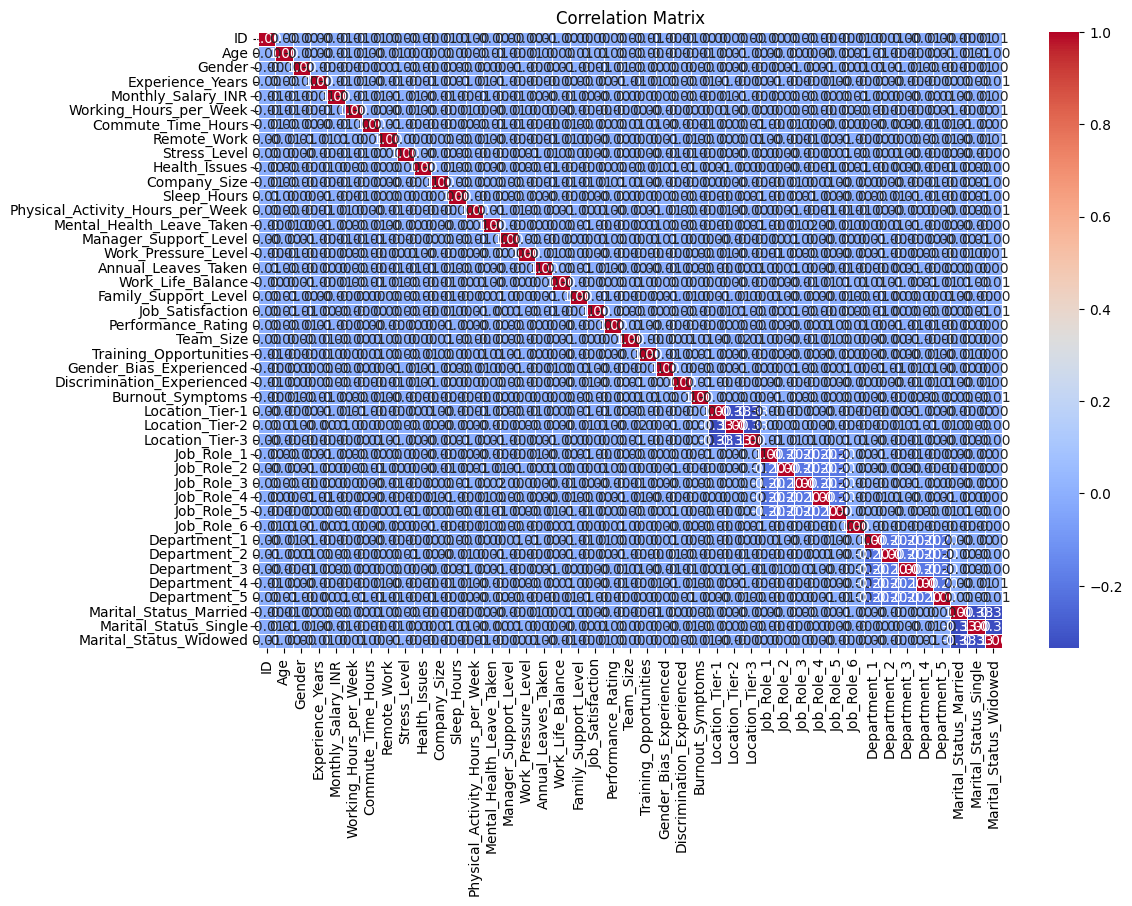

In [43]:
# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

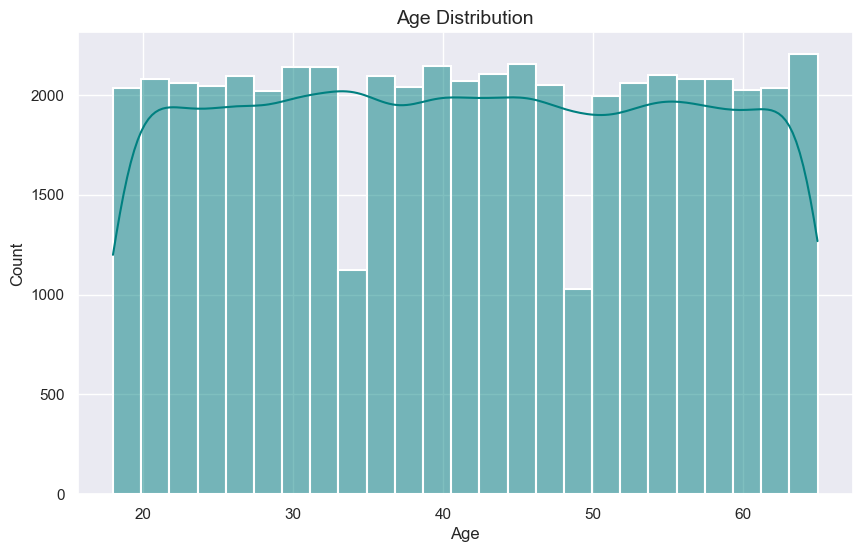

In [46]:
# Set a custom theme
sns.set_theme(style="darkgrid", palette="muted")

# Example plot: Distribution of `Age` with customized style
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='teal', bins=25, linewidth=1.5)
plt.title('Age Distribution', fontsize=14)
plt.show()


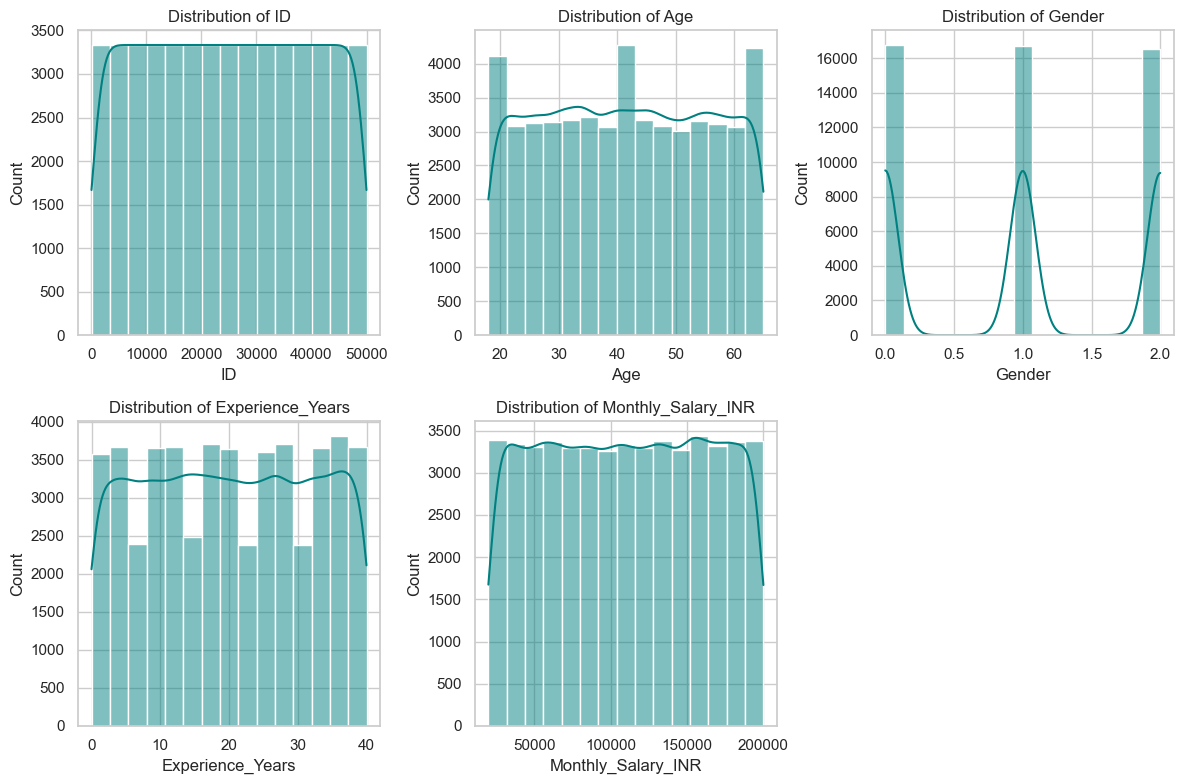

In [47]:
# Set the style for simplicity and readability
sns.set(style="whitegrid")

# Plotting histograms for the first 5 numerical features
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns[:5], 1):  # Only plotting the first 5 columns for simplicity
    plt.subplot(2, 3, i)  # Create a 2x3 grid of subplots
    sns.histplot(df[column], kde=True, color='teal', bins=15)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


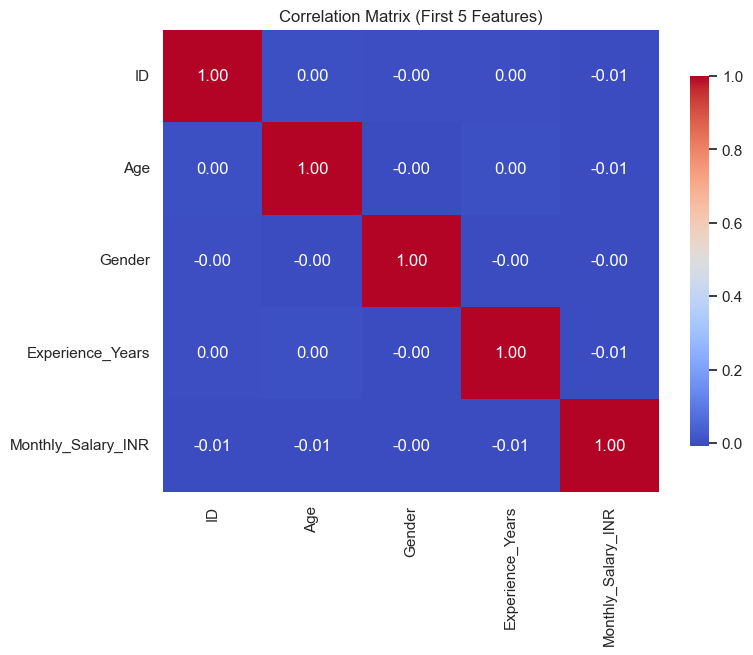

In [48]:
# Compute the correlation matrix for the first 5 columns
correlation_matrix = df[numerical_columns[:5]].corr()

# Set up the matplotlib figure with a smaller size
plt.figure(figsize=(8, 6))

# Create a simple heatmap for correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix (First 5 Features)')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_11096\3655564888.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')
C:\Users\user\AppData\Local\Temp\ipykernel_11096\3655564888.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Marital_Status_Married', data=df, palette='pastel')
C:\Users\user\AppData\Local\Temp\ipykernel_11096\3655564888.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Company_Size', data=df, palette='coolwarm')


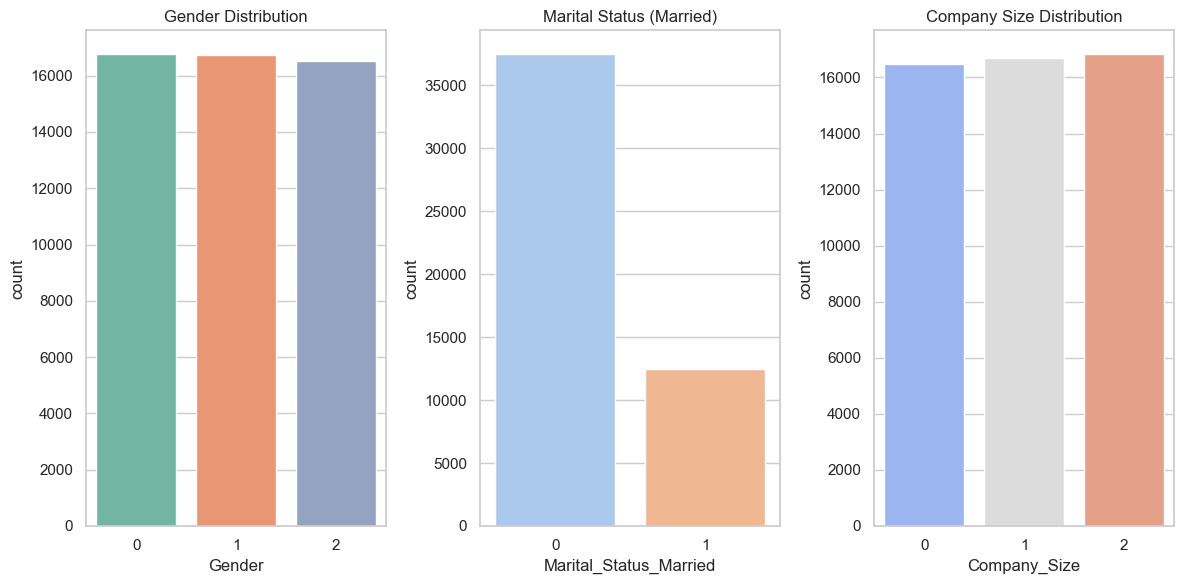

In [49]:
# Countplot for Gender, Marital Status, and Company Size
plt.figure(figsize=(12, 6))

# Plot countplot for Gender
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')

# Plot countplot for Marital Status (Married, Single, Widowed)
plt.subplot(1, 3, 2)
sns.countplot(x='Marital_Status_Married', data=df, palette='pastel')
plt.title('Marital Status (Married)')

# Plot countplot for Company Size
plt.subplot(1, 3, 3)
sns.countplot(x='Company_Size', data=df, palette='coolwarm')
plt.title('Company Size Distribution')

plt.tight_layout()
plt.show()


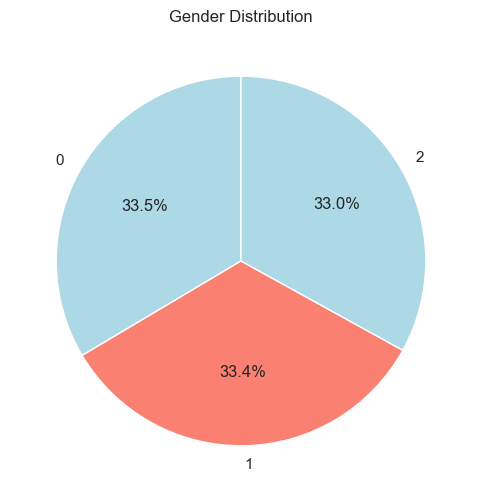

In [50]:
# Plotting a Pie chart for Gender distribution
gender_counts = df['Gender'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Gender Distribution')
plt.ylabel('')  # Remove y-axis label
plt.show()


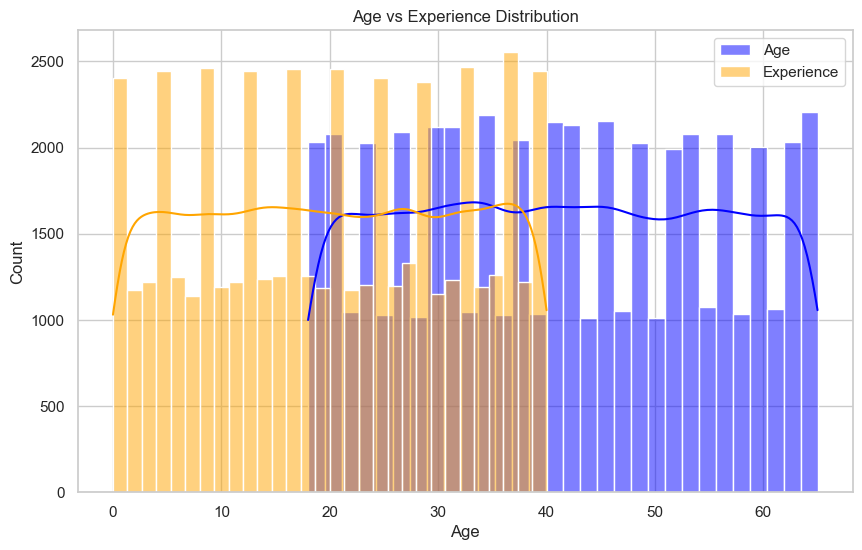

In [51]:
# Overlay histograms for Age and Experience Years
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='blue', label='Age', bins=30)
sns.histplot(df['Experience_Years'], kde=True, color='orange', label='Experience', bins=30)
plt.legend()
plt.title('Age vs Experience Distribution')
plt.show()


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   ID                                50000 non-null  int64
 1   Age                               50000 non-null  int64
 2   Gender                            50000 non-null  int64
 3   Experience_Years                  50000 non-null  int64
 4   Monthly_Salary_INR                50000 non-null  int64
 5   Working_Hours_per_Week            50000 non-null  int64
 6   Commute_Time_Hours                50000 non-null  int64
 7   Remote_Work                       50000 non-null  int64
 8   Stress_Level                      50000 non-null  int64
 9   Health_Issues                     50000 non-null  int64
 10  Company_Size                      50000 non-null  int64
 11  Sleep_Hours                       50000 non-null  int64
 12  Physical_Activity_Hours_per_Week